# Import Packages

## Basic Packages

In [1]:
import os

## Data Operations 

In [2]:
import math
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta

## Machine Learning 

In [3]:
# from fbprophet import Prophet
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

## Data Visualization

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV File

In [25]:
# cwd = os.path.dirname(os.path.realpath(__file__))
# FilePath = cwd + '\\Create_Accounts_Num.csv'
FilePath = 'Create_Accounts_Num.csv'
Account_Origin = pd.read_csv(FilePath)

## Delete complicate rows

In [27]:
Account_Origin = Account_Origin.drop_duplicates(keep='last')

## Transform date column

In [29]:
Account_Origin.loc[:,'Date'] = Account_Origin['DateTime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
Account_Origin.loc[:,'Year'] = Account_Origin['Date'].apply(lambda x: x.year)
Account_Origin.loc[:,'Month'] = Account_Origin['Date'].apply(lambda x: x.month)
Account_Origin.loc[:,'Day'] = Account_Origin['Date'].apply(lambda x: x.day)
Account_Origin.loc[:,'Hour'] = Account_Origin['Date'].apply(lambda x: x.hour)
Account_Origin.loc[:,'YMD'] = pd.to_datetime(Account_Origin[['Year','Month','Day']])

# del Account_Origin['DateTime']
Account_Origin

,account,initial_balance,ledger_index,parent,tx_hash,DateTime,Date,Year,Month,Day,Hour,YMD
0,rfwcdVfU6KpQ4o8ZUQpSwPDmJirbHMFUyN,399.980000,52987663,rLHzPsX6oXkzU2qL12kHCH8G8cnZv1rBJh,57AAF84EF0D96490927612873F4483EA15F6A516519817...,2020-01-25 23:59:21,2020-01-25 23:59:21,2020,1,25,23,2020-01-25
1,rP7ahowhQFKVj3VgiAVdkY8huFpJnPpUHe,599.603924,52987643,rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,0A397B4CBF7806EE80EABBCD0E99323CBE9F59EFACAA8E...,2020-01-25 23:58:01,2020-01-25 23:58:01,2020,1,25,23,2020-01-25
2,raMvTDWWCisfCZ9BCvMgUrZmcwUpqsbQAF,90.785292,52987589,rLqcHzNuAaG8xtvTVrtSsznLTEs1475ZnQ,B77EFB1E2D9EA739EBA797A62674631939F50986431051...,2020-01-25 23:54:30,2020-01-25 23:54:30,2020,1,25,23,2020-01-25
3,rnjJyvKkrrpRJusnJSCPeU8M8ByzX7CtyG,120.490000,52987575,rfj7BPusLEYQFt8WYQ624Ejg49kfod3yDF,C4ECEA81A065A3EA7FF1D3085183624A212AC4866D4D7E...,2020-01-25 23:53:32,2020-01-25 23:53:32,2020,1,25,23,2020-01-25
4,rweZA5ZUqYNp4SLcBkqdSKSf63F8Bn3h4m,100.000000,52987562,rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,D647DE6E98E4CDC2EC907EA3F09DF0FA7C4DCB4E86AF5C...,2020-01-25 23:52:41,2020-01-25 23:52:41,2020,1,25,23,2020-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...
793423,rpdnypvQDGafUydFWdGQGjg3XdDshsUpC3,20.000000,36080161,rDCgaaSBAWYfsxUYhCk1n26Na7x8PQGmkq,86F4A9930651AA8156267602652D74BA0BCED10099C99D...,2018-01-25 00:01:31,2018-01-25 00:01:31,2018,1,25,0,2018-01-25
793424,rhGDzsidDhdU68wS2yQpwS5FEohAXF7E8k,29.850000,36080161,rDCgaaSBAWYfsxUYhCk1n26Na7x8PQGmkq,1A771E40A1E84479A25B13087CA71B073FB1974E2853B7...,2018-01-25 00:01:31,2018-01-25 00:01:31,2018,1,25,0,2018-01-25
793425,rspTGtqPjzqpZBf6L5omkuEh5WAfWpPQ7i,50.000000,36080159,rDsbeomae4FXwgQTJp9Rs64Qg9vDiTCdBv,30445889A9567C62C4B74A639E63E7FD7BEF3E1B2F5E1F...,2018-01-25 00:01:22,2018-01-25 00:01:22,2018,1,25,0,2018-01-25
793426,rBzkC2V69e7M9kgE5hv66eyAW1r7PP7kTs,99.850000,36080158,rL3ggCUKaiR1iywkGW6PACbn3Y8g5edWiY,749CF81C0165A257BAD962385EDCD41762FC1374F2D3E5...,2018-01-25 00:01:21,2018-01-25 00:01:21,2018,1,25,0,2018-01-25


# Aggregate by day 

In [30]:
Account_Day = pd.DataFrame({'count' : Account_Origin.groupby(['YMD'])['account'].count()}).reset_index()
Account_Day

,YMD,count
0,2018-01-25,2427
1,2018-01-26,2779
2,2018-01-27,2693
3,2018-01-28,2830
4,2018-01-29,2595
...,...,...
725,2020-01-21,529
726,2020-01-22,493
727,2020-01-23,474
728,2020-01-24,447


In [31]:
len(Account_Day)

730

### Descriptive Analysis

In [32]:
Account_Day_Mean = Account_Day['count'].mean()
Account_Day_Std = Account_Day['count'].std()
Account_Day_Median = Account_Day['count'].median()
Account_Day_10 = np.percentile(Account_Day['count'], 10)
Account_Day_25 = np.percentile(Account_Day['count'], 25)
Account_Day_75 = np.percentile(Account_Day['count'], 75)
Account_Day_90 = np.percentile(Account_Day['count'], 90)
Stats_Num = [Account_Day_Mean, Account_Day_Std, Account_Day_Median, Account_Day_10, Account_Day_25, Account_Day_75, Account_Day_90]
Stats_Nam = ['Mean', 'Std', 'Median', '10 Percentile', '25 Percentile', '75 Percentile', '90 Percentile']
pd.DataFrame(list(zip(Stats_Nam, Stats_Num)), columns =['Name', 'Statistic']) 

,Name,Statistic
0,Mean,1086.858904
1,Std,720.191691
2,Median,899.000000
3,10 Percentile,474.900000
4,25 Percentile,635.750000
5,75 Percentile,1249.250000
6,90 Percentile,2058.000000


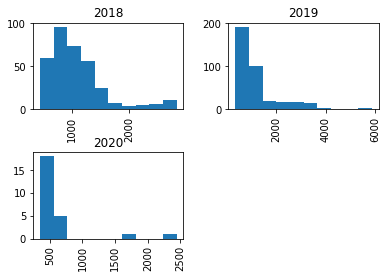

In [35]:
Account_Day_Year = Account_Day
Account_Day_Year['Year'] = Account_Day['YMD'].apply(lambda x: x.year)
Account_Day_Year.hist(by='Year',column = 'count')
plt.show()

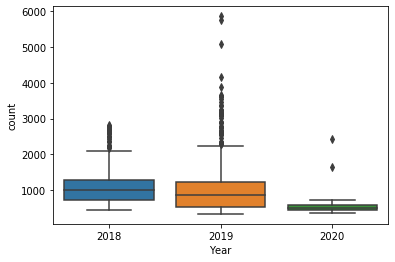

In [34]:
sns.boxplot(x="Year", y="count", data=Account_Day_Year)

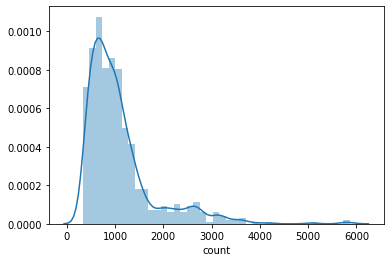

In [36]:
sns.distplot(Account_Day_Year['count'])

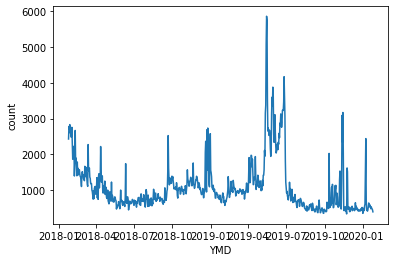

In [37]:
sns.lineplot(x="YMD", y="count", markers=True, dashes=False, data=Account_Day)

### TimeSeries Decomposition 

#### Stationarity Checking 

In [42]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    #rolstd = pd.Series(timeseries).rolling(window=12).std()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

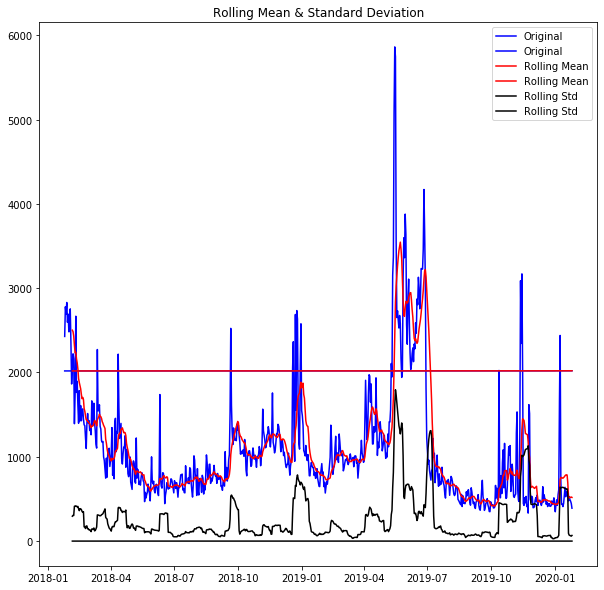

Results of Dickey-Fuller Test:
Test Statistic                  -3.386409
p-value                          0.011431
#Lags Used                      11.000000
Number of Observations Used    718.000000
Critical Value (1%)             -3.439490
Critical Value (5%)             -2.865574
Critical Value (10%)            -2.568918
dtype: float64


In [44]:
TS_Account_Day = Account_Day.set_index('YMD')
test_stationarity(TS_Account_Day)

#### Time Series Decomposition

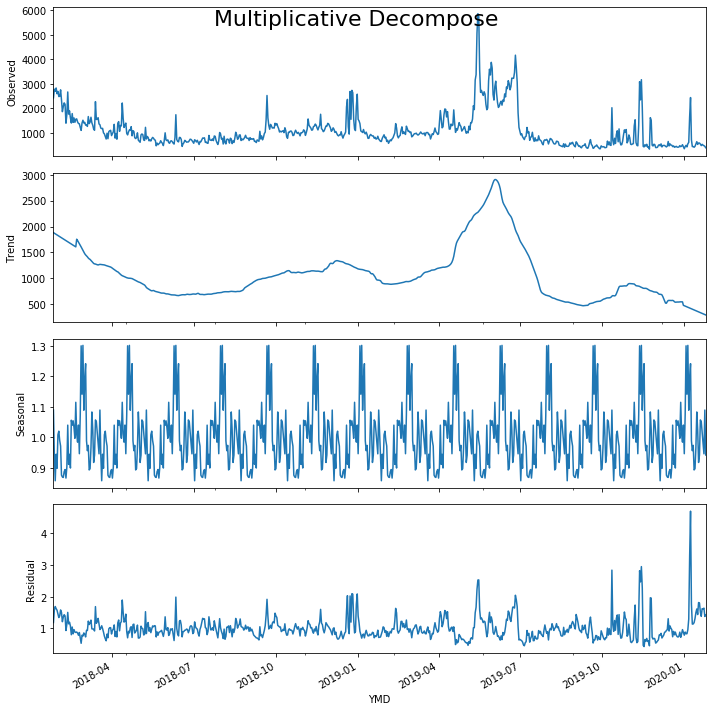

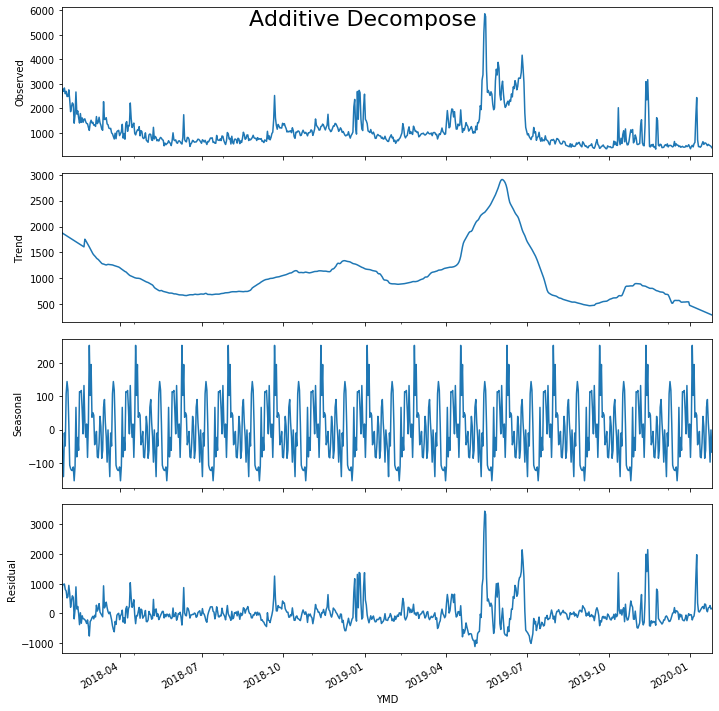

In [40]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(TS_Account_Day['count'], model='multiplicative', extrapolate_trend='freq', freq = 52)

# Additive Decomposition
result_add = seasonal_decompose(TS_Account_Day['count'], model='additive', extrapolate_trend='freq', freq = 52)

# # Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

#### Building up TS mode (ARIMA...)

#### TS Prediction

# Research on Parent Account

## Strange Parent Account Hash --> Monitor those accounts

## Active Time

## Network Plot